In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
CS_HOUSE_PRICE_PATH = Path("Data", "Case_Shiller.csv")
MORTGAGE_RATE_PATH = Path("Data", "MORTGAGE30US.csv")

In [3]:
cs_house_price_df = pd.read_csv(CS_HOUSE_PRICE_PATH)
cs_house_price_df["Datetime"] = pd.to_datetime(cs_house_price_df["DATE"])
cs_house_price_df.drop(columns = ["DATE"],inplace = True)
cs_house_price_s = cs_house_price_df.set_index("Datetime")["CSUSHPINSA"]
print(cs_house_price_s.shape)
cs_house_price_s.head()

(443,)


Datetime
1987-01-01    63.735
1987-02-01    64.134
1987-03-01    64.470
1987-04-01    64.973
1987-05-01    65.547
Name: CSUSHPINSA, dtype: float64

In [4]:
mortgage_30_year_raw_df = pd.read_csv(MORTGAGE_RATE_PATH)
mortgage_30_year_raw_df["Datetime"] = pd.to_datetime(mortgage_30_year_raw_df["DATE"])
mortgage_30_year_raw_df.drop(columns=["DATE"], inplace=True)
mortgage_30_year_raw_s = mortgage_30_year_raw_df.set_index("Datetime")["MORTGAGE30US"]
print(mortgage_30_year_raw_df.columns)
mortgage_30_year_raw_s.head()

Index(['MORTGAGE30US', 'Datetime'], dtype='object')


Datetime
1971-04-02    7.33
1971-04-09    7.31
1971-04-16    7.31
1971-04-23    7.31
1971-04-30    7.29
Name: MORTGAGE30US, dtype: float64

In [5]:
mortgage_30_year_raw_s.resample("d").ffill()

Datetime
1971-04-02    7.33
1971-04-03    7.33
1971-04-04    7.33
1971-04-05    7.33
1971-04-06    7.33
              ... 
2024-02-04    6.63
2024-02-05    6.63
2024-02-06    6.63
2024-02-07    6.63
2024-02-08    6.64
Freq: D, Name: MORTGAGE30US, Length: 19306, dtype: float64

In [6]:
raw_data = {"CSUSHPINSA": cs_house_price_s, "MORTGAGE_30": mortgage_30_year_raw_s}
pd.DataFrame(raw_data).dropna()


,CSUSHPINSA,MORTGAGE_30
Datetime,,
1987-05-01,65.547,10.47
1988-04-01,69.788,10.05
1988-07-01,71.686,10.39
1989-09-01,76.421,10.22
1989-12-01,76.498,9.74
1990-06-01,77.505,10.29
1991-02-01,75.249,9.56
1991-03-01,75.137,9.40
1991-11-01,76.031,8.78


In [12]:
import pandas as pd

# Assuming you have already read the CSV file and processed the data as mentioned in your previous code
# mortgage_30_year_raw_df = pd.read_csv(MORTGAGE_RATE_PATH)
# mortgage_30_year_raw_df["Datetime"] = pd.to_datetime(mortgage_30_year_raw_df["DATE"])
# mortgage_30_year_raw_df.drop(columns=["DATE"], inplace=True)

# Filter mortgage data for a specific date range (e.g., from start_date to end_date)
start_date = '2023-01-01'
end_date = '2023-12-31'

mortgage_30_year_filtered = mortgage_30_year_raw_df.loc[(mortgage_30_year_raw_df['Datetime'] >= start_date) & (mortgage_30_year_raw_df['Datetime'] <= end_date)]

# Print the filtered DataFrame
print(mortgage_30_year_filtered.head())

      MORTGAGE30US   Datetime
2701          6.48 2023-01-05
2702          6.33 2023-01-12
2703          6.15 2023-01-19
2704          6.13 2023-01-26
2705          6.09 2023-02-02


In [13]:
import pandas as pd

# Assuming you have already created the DataFrame from raw_data
# raw_data = {"CSUSHPINSA": cs_house_price_s, "MORTGAGE_30": mortgage_30_year_raw_s}
# cs_house_price_df = pd.DataFrame(raw_data).dropna()

# Filter cs_house_price_s data for a specific date range (e.g., from start_date to end_date)
start_date = '2023-01-01'
end_date = '2023-12-31'

# Filtered DataFrame for 'CSUSHPINSA' column
cs_filtered = cs_house_price_df.loc[(cs_house_price_df['Datetime'] >= start_date) & (cs_house_price_df['Datetime'] <= end_date)]

# Print the filtered DataFrame
print(cs_filtered.head())


     CSUSHPINSA   Datetime
432     292.820 2023-01-01
433     293.435 2023-02-01
434     297.305 2023-03-01
435     301.481 2023-04-01
436     305.358 2023-05-01


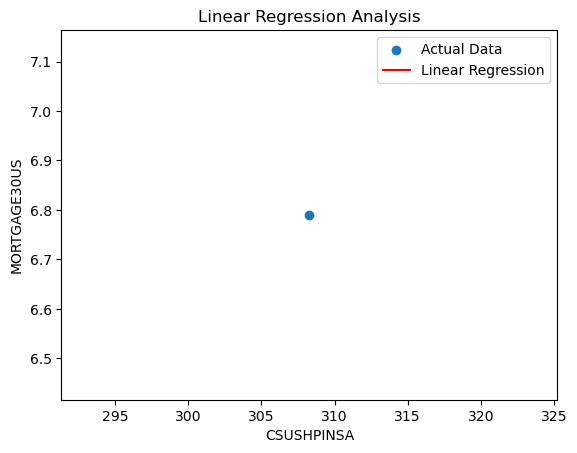

In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Merge DataFrames on the 'Datetime' column
merged_df = pd.merge(cs_filtered, mortgage_30_year_filtered, on='Datetime')

# Prepare data for linear regression
X = merged_df['CSUSHPINSA'].values.reshape(-1, 1)
y = merged_df['MORTGAGE30US'].values

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Plot the scatter plot and regression line
plt.scatter(X, y, label='Actual Data')
plt.plot(X, predictions, color='red', label='Linear Regression')
plt.xlabel('CSUSHPINSA')
plt.ylabel('MORTGAGE30US')
plt.title('Linear Regression Analysis')
plt.legend()
plt.show()

